In [1]:
import numpy as np
import glob
import mdtraj as md

In [3]:
# step 1 - given the contact maps, extract the indexes of residues for top5 contacts with biggest positive
# changes in contacts, > 0.2

In [2]:
contact_maps = np.load('contact_maps_bool.npy')

In [3]:
wt_contact_map = np.load('wt_contact_map_bool.npy')

In [50]:
contact_maps_dict = dict()

for run in range(len(contact_maps)):
    
    if run == 12:
        # the 161 residue case
        continue
        
    contact_map = contact_maps[run] - wt_contact_map
    
    contact_map_ = np.zeros(contact_map.shape)
    
    for i, x in enumerate(contact_map):
        for j, y in enumerate(x):
            if j > i:
                break
            else:
                contact_map_[i,j] = contact_map[i,j]
    
    contact_maps_dict[run] = contact_map_

In [51]:
contact_maps_12 = np.zeros((162,162))

for i in range(162):
    for j in range(162):
        if i == 92 or j == 92:
            contact_maps_12[i,j] = np.nan
        else:
            if i > 92:
                x = i - 1
            else:
                x = i
            if j > 92:
                y = j - 1
            else:
                y = j
            contact_maps_12[i,j] = contact_maps[12][x,y]
            
run = 12

contact_map = contact_maps_12 - wt_contact_map

contact_map_ = np.zeros(contact_map.shape)

for i, x in enumerate(contact_map):
    for j, y in enumerate(x):
        if j > i:
            break
        else:
            contact_map_[i,j] = contact_map[i,j]

contact_maps_dict[run] = contact_map

In [52]:
extracted_contacts_dict = dict()

for run in range(len(contact_maps)):
    contact_map = contact_maps_dict[run]
    pos_top_5_indexes = []
    neg_top_5_indexes = []
    pos_top_5_values = []
    neg_top_5_values = []
    
    pos_indexes = np.unravel_index(np.argsort(contact_map.ravel())[-5:], contact_map.shape)
    neg_indexes = np.unravel_index(np.argsort(contact_map.ravel())[:5], contact_map.shape)
    
    for i in range(5):
        if contact_map[pos_indexes][i] >= 0.2:
            pos_top_5_indexes.append((pos_indexes[0][i], pos_indexes[1][i]))
            pos_top_5_values.append(contact_map[pos_indexes][i])
            
        if contact_map[neg_indexes][i] <= 0.2:
            neg_top_5_indexes.append((neg_indexes[0][i], neg_indexes[1][i]))
            neg_top_5_values.append(contact_map[neg_indexes][i])
            
    extracted_contacts_dict[run] = [pos_top_5_indexes, pos_top_5_values, neg_top_5_indexes, neg_top_5_values]       

In [53]:
extracted_contacts_dict

{0: [[(145, 83), (160, 108), (95, 56), (104, 80), (98, 37)],
  [0.23312908496732029,
   0.23435566448801748,
   0.25020966952909895,
   0.29703097664589828,
   0.36950290880588915],
  [(7, 4), (160, 153), (105, 101), (160, 157), (156, 152)],
  [-0.25185407687467476,
   -0.2296068083697958,
   -0.21659829472505016,
   -0.20951524963537638,
   -0.19945860566448781]],
 1: [[(96, 79), (103, 24), (104, 54), (94, 71), (105, 80)],
  [0.20025871459694961,
   0.2012141832247647,
   0.20653947483278223,
   0.25511873638344235,
   0.29112108688773219],
  [(16, 12), (120, 12), (15, 12), (119, 12), (159, 145)],
  [-0.49208496732026141,
   -0.44621296296296292,
   -0.38376051952964441,
   -0.34703485838779946,
   -0.26165650175855892]],
 2: [[(105, 80), (98, 37)],
  [0.20736291695309167, 0.40159168876231593],
  [(158, 80), (159, 145), (156, 83), (158, 79), (159, 153)],
  [-0.3086072984749455,
   -0.30854920328361346,
   -0.29853263336497649,
   -0.29266916356600126,
   -0.29215572431903547]],
 3: [[

In [58]:
contact_maps_dict[0][105,80]

0.23194897359797195

In [60]:
# extract frames on HAL
# need dictionary of just RUN: list of indexes for each positive and negative

In [66]:
extracted_contacts_dict_pos = dict()
extracted_contacts_dict_neg = dict()

for run in extracted_contacts_dict:
    extracted_contacts_dict_pos[run] = extracted_contacts_dict[run][0]
    extracted_contacts_dict_neg[run] = extracted_contacts_dict[run][2]

In [68]:
extracted_contacts_dict_pos

{0: [(145, 83), (160, 108), (95, 56), (104, 80), (98, 37)],
 1: [(96, 79), (103, 24), (104, 54), (94, 71), (105, 80)],
 2: [(105, 80), (98, 37)],
 3: [(96, 79), (94, 55), (93, 55), (126, 55), (127, 55)],
 4: [(104, 96), (98, 37)],
 5: [(140, 35), (158, 35), (132, 47), (17, 14), (158, 107)],
 6: [(79, 75), (78, 74), (80, 76), (81, 78), (80, 77)],
 7: [(158, 68), (16, 13)],
 8: [(52, 25), (116, 54), (141, 51), (114, 51), (135, 51)],
 9: [(17, 14), (6, 3), (98, 37)],
 10: [(17, 14), (96, 79), (160, 77), (145, 116), (144, 116)],
 11: [(78, 71), (94, 71), (96, 76), (81, 78), (79, 76)],
 12: [],
 13: [(119, 8), (94, 71), (10, 7), (11, 7), (17, 14)],
 14: [(53, 23), (116, 54), (93, 55), (126, 55), (127, 55)],
 15: [(116, 54), (140, 35), (106, 102), (105, 100), (105, 101)],
 16: [(100, 29), (45, 23), (25, 22), (26, 23), (99, 55)],
 17: [(105, 80), (145, 109), (6, 3), (158, 107), (145, 106)],
 18: [(143, 79), (81, 78), (80, 77), (123, 120), (125, 120)],
 19: [(11, 8), (103, 24), (98, 37)],
 20:

In [69]:
extracted_contacts_dict_neg

{0: [(7, 4), (160, 153), (105, 101), (160, 157), (156, 152)],
 1: [(16, 12), (120, 12), (15, 12), (119, 12), (159, 145)],
 2: [(158, 80), (159, 145), (156, 83), (158, 79), (159, 153)],
 3: [(93, 56), (101, 55), (93, 54), (95, 55), (104, 55)],
 4: [(159, 145), (159, 108), (158, 143), (42, 27), (159, 153)],
 5: [(158, 79), (159, 145), (156, 81), (158, 81), (156, 152)],
 6: [(79, 71), (158, 80), (96, 79), (20, 1), (16, 1)],
 7: [(49, 45), (158, 80), (50, 19), (17, 12), (156, 81)],
 8: [(106, 52), (50, 45), (159, 108), (159, 145), (160, 153)],
 9: [(65, 61), (83, 65), (66, 62), (83, 68), (83, 64)],
 10: [(159, 145), (159, 108), (80, 54), (158, 79), (81, 54)],
 11: [(78, 74), (158, 79), (79, 71), (158, 81), (156, 81)],
 12: [(93, 81), (81, 93), (94, 80), (80, 94), (80, 95)],
 13: [(148, 144), (152, 147), (98, 37), (104, 98), (159, 145)],
 14: [(101, 24), (101, 53), (102, 24), (101, 22), (93, 56)],
 15: [(101, 24), (101, 53), (101, 22), (102, 24), (52, 24)],
 16: [(101, 22), (119, 16), (53, 

In [84]:
# got frame indexes from HAL

In [132]:
frame_indexes = np.load('extract_frames_indexes_all_top5_pos.npy')

In [133]:
frame_indexes.shape

(27,)

In [134]:
lengths = []

for x in frame_indexes:
    lengths.append(len(x))

In [135]:
lengths

[505,
 1679,
 8991,
 8335,
 12410,
 1340,
 4839,
 4777,
 1163,
 7244,
 2428,
 11917,
 20670,
 4040,
 1419,
 3885,
 545,
 0,
 3906,
 4905,
 3153,
 13436,
 3809,
 8871,
 2792,
 5255,
 4467]

In [131]:
# DISCARD RUN12 - that had no contacts > 0.2, I thought it wouldn't pick any frames but it actually picks all

In [136]:
frame_indexes[12] = []

In [121]:
# add + 1500 to the indexes, take every 10th frame

In [137]:
frame_indexes_10strided = []

for x in frame_indexes:
    frame_indexes_ = []
    for frame in x:
        if len(x) < 7500:
            if frame[1]%10 == 0:
                frame_indexes_.append((frame[0], int(frame[1])+1500))
        else:
            if frame[1]%20 == 0:
                frame_indexes_.append((frame[0], int(frame[1])+1500))
    frame_indexes_10strided.append(frame_indexes_)

In [138]:
lengths = []

for x in frame_indexes_10strided:
    lengths.append(len(x))

In [139]:
lengths

[55,
 163,
 462,
 421,
 624,
 130,
 468,
 487,
 118,
 713,
 243,
 613,
 0,
 414,
 151,
 371,
 51,
 0,
 374,
 488,
 315,
 685,
 378,
 462,
 284,
 542,
 451]

In [140]:
# extract on external hard drive

In [141]:
for run in range(len(frame_indexes_10strided)):
    if not frame_indexes_10strided[run]:
        continue
    
    started = False
    for (clone,frame) in frame_indexes_10strided[run]:
        if not started:
            traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run,clone))[frame]
            started = True
        else:
            traj_ = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run,clone))[frame]
            traj = md.join([traj, traj_])
            
    traj.save('/Volumes/DATA/11713_extracted_frames_pos/run%d.h5' % run)

In [ ]:
for run in [x for x in range(27) if x not in [12,17]]: 
    traj = md.load('/Volumes/DATA/11713_extracted_frames_pos/run%d.h5' % run)
    traj = traj.atom_slice(traj.top.select('not element H'))
    traj.save('/Volumes/DATA/11713_extracted_frames_pos/run%d.dcd' % run)

In [4]:
# now negative

In [5]:
frame_indexes = np.load('extract_frames_indexes_all_top5_neg.npy')

In [6]:
lengths = []

for x in frame_indexes:
    lengths.append(len(x))

In [7]:
lengths

[2374,
 7068,
 7433,
 7521,
 1528,
 8672,
 14317,
 7613,
 5086,
 3483,
 7641,
 14935,
 6318,
 8235,
 10338,
 12049,
 9160,
 7902,
 9600,
 1880,
 9402,
 9306,
 6850,
 1288,
 7146,
 11759,
 12815]

In [8]:
frame_indexes_10strided = []

for x in frame_indexes:
    frame_indexes_ = []
    for frame in x:
        if len(x) < 7500:
            if frame[1]%10 == 0:
                frame_indexes_.append((frame[0], int(frame[1])+1500))
        else:
            if frame[1]%20 == 0:
                frame_indexes_.append((frame[0], int(frame[1])+1500))
    frame_indexes_10strided.append(frame_indexes_)

In [9]:
lengths = []

for x in frame_indexes_10strided:
    lengths.append(len(x))

In [10]:
lengths

[228,
 688,
 738,
 395,
 166,
 442,
 728,
 391,
 492,
 345,
 377,
 754,
 621,
 409,
 534,
 598,
 470,
 391,
 469,
 185,
 488,
 466,
 685,
 125,
 702,
 579,
 640]

In [11]:
for run in range(len(frame_indexes_10strided)):
    if not frame_indexes_10strided[run]:
        continue

    started = False
    for (clone,frame) in frame_indexes_10strided[run]:
        if not started:
            traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run,clone))[frame]
            started = True
        else:
            traj_ = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run,clone))[frame]
            traj = md.join([traj, traj_])

    traj.save('/Volumes/DATA/11713_extracted_frames_neg/run%d.h5' % run)

In [13]:
for run in range(27):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_neg/run%d.h5' % run)
    traj = traj.atom_slice(traj.top.select('not element H'))
    traj.save('/Volumes/DATA/11713_extracted_frames_neg/run%d.dcd' % run)

In [1]:
# Shi came back with "new conformations" - let's save those as trajectories to then take to HAL for RMSD calculation

In [5]:
pos_new_conf_dict = {
4: [[51,60], [104,126], [544,558], [560,585]], 
5: [[1,8]], 
6: [[195,201]], 
8: [[113,118]], 
9: [[100,132], [195,233], [248,278], [467,509], [606,648]], 
11: [[35,51], [70,92], [261,272]], 
13: [[234,328]], 
15: [[124,140], [144,156], [158,166]], 
19: [[274,309]], 
21: [[274,292], [402,423], [662,667]], 
23: [[290,305]]}

In [6]:
neg_new_conf_dict = {
5: [[1,9]], 
6: [[496,521]],
9: [[97,143], [161,170], [269,318]],
11: [[17,42], [70,94]],
12: [[397,447], [550,571], [572,610]],
17: [[344,355]], 
21: [[308,329]],
22: [[56,106]],
23: [[20,29]]}

In [18]:
pos_new_conf_trajs = []

for run in pos_new_conf_dict:
    traj = md.load('/Volumes/DATA/11713_extracted_frames_pos/run%d.h5' % run)
    limits = pos_new_conf_dict[run]
    pos_new_conf_trajs.append([])
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        traj_.save('/Volumes/DATA/11713_extracted_frames_pos_newconf/run%d_%d.h5' % (run,i))   

In [20]:
neg_new_conf_trajs = []

for run in neg_new_conf_dict:
    traj = md.load('/Volumes/DATA/11713_extracted_frames_neg/run%d.h5' % run)
    limits = neg_new_conf_dict[run]
    neg_new_conf_trajs.append([])
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        traj_.save('/Volumes/DATA/11713_extracted_frames_neg_newconf/run%d_%d.h5' % (run,i))  

In [ ]:
# take to HAL for RMSD

In [7]:
# came back with the closest frames, calc and save 2 things now: a) in the runs that are both in new conf pos and neg - 
# do any frames overlap - just check with any rmsds are 0; b) rmsd of the new confs to closest wt frames

In [5]:
import glob
import mdtraj as md
import numpy as np

In [13]:
overlapping_runs = [5,6,9,11,21,23]

In [72]:
overlapping_runs_trajs_pos = []
overlapping_runs_trajs_neg = []

for run in overlapping_runs:
    started = False
    for traj in glob.glob('11713_extracted_frames_pos_newconf/run%d_*.h5' % run):
        if started:
            traj_ = md.join([traj_, md.load(traj)])
        else:
            traj_ = md.load(traj)
            started = True
    overlapping_runs_trajs_pos.append(traj_)
    
    started = False
    for traj in glob.glob('11713_extracted_frames_neg_newconf/run%d_*.h5' % run):
        if started:
            traj_ = md.join([traj_, md.load(traj)])
        else:
            traj_ = md.load(traj)
            started = True
    overlapping_runs_trajs_neg.append(traj_)

In [73]:
overlapping_runs_trajs_neg

[<mdtraj.Trajectory with 9 frames, 162 atoms, 162 residues, and unitcells at 0x121295828>,
 <mdtraj.Trajectory with 26 frames, 162 atoms, 162 residues, and unitcells at 0x1210827b8>,
 <mdtraj.Trajectory with 107 frames, 162 atoms, 162 residues, and unitcells at 0x120cb0f60>,
 <mdtraj.Trajectory with 51 frames, 162 atoms, 162 residues, and unitcells at 0x120cc40b8>,
 <mdtraj.Trajectory with 22 frames, 162 atoms, 162 residues, and unitcells at 0x120c91c50>,
 <mdtraj.Trajectory with 10 frames, 162 atoms, 162 residues, and unitcells at 0x120a2eb00>]

In [74]:
rmsds_pos_to_neg = []

for i in range(len(overlapping_runs_trajs_pos)):
    pos_traj = overlapping_runs_trajs_pos[i]
    neg_traj = overlapping_runs_trajs_neg[i]
    
    rmsds = []
    for frame in range(len(neg_traj)):
        rmsd = md.rmsd(pos_traj, neg_traj, frame=frame)
        rmsds.append(rmsd)
        
    rmsds_pos_to_neg.append(rmsds) 

In [40]:
np.argwhere(rmsds_pos_to_neg[0][0] == 0)

array([], shape=(0, 1), dtype=int64)

In [75]:
same_frames = []

for run in rmsds_pos_to_neg:
    same_frames.append([])
    for frame in run:
        same_frames[-1].append(np.argwhere(frame == 0))

In [76]:
same_frames

[[array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([[4]]),
  array([[5]]),
  array([[6]])],
 [array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype=int64),
  array([], shape=(0, 1), dtype

In [77]:
same_frames_list = []

for x in same_frames:
    same_frames_list.append([])
    for y in x:
        if y:
            same_frames_list[-1].append(y[0,0])
        else:
            same_frames_list[-1].append([])

In [78]:
same_frames_list

[[[], [], [], [], [], [], 4, 5, 6],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  88,
  [],
  [],
  [],
  101,
  [],
  [],
  [],
  [],
  [],
  [],
  146,
  147,
  [],
  148,
  149,
  150,
  [],
  [],
  [],
  [],
  151,
  152,
  [],
  153,
  [],
  155,
  [],
  [],
  158,
  159,
  160,
  [],
  162,
  [],
  164,
  165,
  166,
  [],
  168,
  169,
  [],
  [],
  172,
  [],
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  [],
  183,
  184,
  185,
  [],
  187,
  188],
 [[],
  [],
  [],
  1,
  2,
  3,
  [],
  4,
  5,
  [],
  6,
  7,
  [],
  [],
  [],
  [],
  [],
  8,
  9,
  [],
  11,
  12,
  13,
  

In [79]:
f = open('11713_extracted_frames_pos_newconf/same_pos_neg_frames.txt', 'w')

f.write(str(same_frames_list))

f.close()

In [46]:
# now RMSD of the new conformations to closest WT in RMSD

In [48]:
for traj in glob.glob('11713_extracted_frames_pos_newconf/*.h5'):
    traj_mut = md.load(traj)
    traj_wt = md.load('11713_extracted_frames_pos_newconf_rmsds/%s' % traj.split('/')[-1])
    traj_wt = traj_wt.atom_slice(traj_wt.top.select('name CA'))
    rmsds_to_wt = []
    for frame in range(len(traj_mut)):
        rmsd = md.rmsd(traj_mut[frame], traj_wt[frame])
        rmsds_to_wt.append(rmsd)
    np.savetxt('11713_extracted_frames_pos_newconf_rmsds/%s.csv' % traj.split('/')[-1][:-3], rmsds_to_wt, delimiter=",")    

In [50]:
for traj in glob.glob('11713_extracted_frames_neg_newconf/*.h5'):
    traj_mut = md.load(traj)
    traj_wt = md.load('11713_extracted_frames_neg_newconf_rmsds/%s' % traj.split('/')[-1])
    if 'run12' in traj:
        traj_wt = traj_wt.atom_slice(traj_wt.top.select('name CA and not (resid 92)'))
    else:    
        traj_wt = traj_wt.atom_slice(traj_wt.top.select('name CA'))
    rmsds_to_wt = []
    for frame in range(len(traj_mut)):
        rmsd = md.rmsd(traj_mut[frame], traj_wt[frame])
        rmsds_to_wt.append(rmsd)
    np.savetxt('11713_extracted_frames_neg_newconf_rmsds/%s.csv' % traj.split('/')[-1][:-3], rmsds_to_wt, delimiter=",")    

In [81]:
# now we have a final list of frames per mutant that don't overlap between positive and negative changes, and we have
# a threshold of 3A to look for similar frames in those mutant datasets - let's see how many frames that picks up

In [3]:
pos_new_conf_dict = {
4: [[51,60], [560,585]], 
5: [[1,8]],  
8: [[113,118]], 
9: [[195,233], [248,278], [467,509], [606,648]],  
21: [[274,292], [402,423]],
}

neg_new_conf_dict = {
5: [[1,6]], 
6: [[496,521]],
9: [[162,164], [269,269], [272,272], [276,279], [282,282], [284,284], [286,287], [291,291], [293,293], [297,297], [300,300], [301,301], [303,303], [312,312], [316,316]],
12: [[397,447], [550,571], [572,610]],
17: [[344,355]], 
21: [[312,312], [319,319], [321,322], [327,329]],
23: [[20,29]]}

pos_new_conf_trajs = []

for run in np.sort([run for run in pos_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_pos/run%d.h5' % run)
    limits = pos_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    pos_new_conf_trajs.append(traj_combined)        
        
neg_new_conf_trajs = []

for run in np.sort([run for run in neg_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_neg/run%d.h5' % run)
    limits = neg_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    neg_new_conf_trajs.append(traj_combined)           

In [4]:
pos_new_conf_trajs

[<mdtraj.Trajectory with 36 frames, 162 atoms, 162 residues, and unitcells at 0x120f8de10>,
 <mdtraj.Trajectory with 8 frames, 162 atoms, 162 residues, and unitcells at 0x120fdf5c0>,
 <mdtraj.Trajectory with 6 frames, 162 atoms, 162 residues, and unitcells at 0x1236c1278>,
 <mdtraj.Trajectory with 156 frames, 162 atoms, 162 residues, and unitcells at 0x123cd0358>,
 <mdtraj.Trajectory with 41 frames, 162 atoms, 162 residues, and unitcells at 0x122ab25c0>]

In [5]:
neg_new_conf_trajs

[<mdtraj.Trajectory with 6 frames, 162 atoms, 162 residues, and unitcells at 0x123664eb8>,
 <mdtraj.Trajectory with 26 frames, 162 atoms, 162 residues, and unitcells at 0x123cdfac8>,
 <mdtraj.Trajectory with 21 frames, 162 atoms, 162 residues, and unitcells at 0x11e196b70>,
 <mdtraj.Trajectory with 112 frames, 161 atoms, 161 residues, and unitcells at 0x126a6a2e8>,
 <mdtraj.Trajectory with 12 frames, 162 atoms, 162 residues, and unitcells at 0x120ffd240>,
 <mdtraj.Trajectory with 7 frames, 162 atoms, 162 residues, and unitcells at 0x120f3dcf8>,
 <mdtraj.Trajectory with 10 frames, 162 atoms, 162 residues, and unitcells at 0x120f650b8>]

In [6]:
# save these as pdb, h5 and dcd - but will all atoms (no H)

In [2]:
pos_new_conf_dict = {
4: [[51,60], [560,585]], 
5: [[1,8]],  
8: [[113,118]], 
9: [[195,233], [248,278], [467,509], [606,648]],  
21: [[274,292], [402,423]],
}

neg_new_conf_dict = {
5: [[1,6]], 
6: [[496,521]],
9: [[162,164], [269,269], [272,272], [276,279], [282,282], [284,284], [286,287], [291,291], [293,293], [297,297], [300,300], [301,301], [303,303], [312,312], [316,316]],
12: [[397,447], [550,571], [572,610]],
17: [[344,355]], 
21: [[312,312], [319,319], [321,322], [327,329]],
23: [[20,29]]}

pos_new_conf_trajs = []

for run in np.sort([run for run in pos_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_pos/run%d.h5' % run)
    limits = pos_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        #traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    pos_new_conf_trajs.append(traj_combined)        
        
neg_new_conf_trajs = []

for run in np.sort([run for run in neg_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_neg/run%d.h5' % run)
    limits = neg_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        #traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    neg_new_conf_trajs.append(traj_combined)           

In [4]:
pos_runs = [4,5,8,9,21]
neg_runs = [5,6,9,12,17,21,23]

for i, traj in enumerate(pos_new_conf_trajs):
    traj.save('/Volumes/DATA/11713_FINAL_newconf/run%d-pos.h5' % pos_runs[i])
    traj.save('/Volumes/DATA/11713_FINAL_newconf/run%d-pos.pdb' % pos_runs[i])
    traj = traj.atom_slice(traj.top.select('not element H'))
    traj.save('/Volumes/DATA/11713_FINAL_newconf/run%d-pos.dcd' % pos_runs[i])
    
for i, traj in enumerate(neg_new_conf_trajs):
    traj.save('/Volumes/DATA/11713_FINAL_newconf/run%d-neg.h5' % neg_runs[i])
    traj.save('/Volumes/DATA/11713_FINAL_newconf/run%d-neg.pdb' % neg_runs[i])
    traj = traj.atom_slice(traj.top.select('not element H'))
    traj.save('/Volumes/DATA/11713_FINAL_newconf/run%d-neg.dcd' % neg_runs[i])

In [99]:
# now calculate rmsds (CA) to all frames in the appropriate mutant data

In [6]:
pos_new_conf_dict = {
4: [[51,60], [560,585]], 
5: [[1,8]],  
8: [[113,118]], 
9: [[195,233], [248,278], [467,509], [606,648]],  
21: [[274,292], [402,423]],
}

neg_new_conf_dict = {
5: [[1,6]], 
6: [[496,521]],
9: [[162,164], [269,269], [272,272], [276,279], [282,282], [284,284], [286,287], [291,291], [293,293], [297,297], [300,300], [301,301], [303,303], [312,312], [316,316]],
12: [[397,447], [550,571], [572,610]],
17: [[344,355]], 
21: [[312,312], [319,319], [321,322], [327,329]],
23: [[20,29]]}

pos_new_conf_trajs = []
pos_new_conf_rmsds = []

for run in np.sort([run for run in pos_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_pos/run%d.h5' % run)
    limits = pos_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    pos_new_conf_trajs.append(traj_combined)
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    all_mut_traj = all_mut_traj.atom_slice(traj.top.select('name CA'))
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        traj = traj.atom_slice(traj.top.select('name CA'))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    rmsds = []
    for frame in traj_combined:
        rmsd = md.rmsd(all_mut_traj, frame)
        rmsds.append(rmsd)
    pos_new_conf_rmsds.append(rmsds)    

neg_new_conf_trajs = []
neg_new_conf_rmsds = []

for run in np.sort([run for run in neg_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_neg/run%d.h5' % run)
    limits = neg_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    neg_new_conf_trajs.append(traj_combined)           
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    all_mut_traj = all_mut_traj.atom_slice(traj.top.select('name CA'))
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        traj = traj.atom_slice(traj.top.select('name CA'))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    rmsds = []
    for frame in traj_combined:
        rmsd = md.rmsd(all_mut_traj, frame)
        rmsds.append(rmsd)
    neg_new_conf_rmsds.append(rmsds)    

In [109]:
# for each frame let's get the list of indexes that are below a threshold RMSD - first get lenghts of combined mutant
# trajectories so I can calculate percentages later

In [7]:
pos_mut_traj_lengths = []
neg_mut_traj_lengths = []

for run in np.sort([run for run in pos_new_conf_dict]):
    length = 0
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        length += len(traj)
        
    pos_mut_traj_lengths.append(length)
    
for run in np.sort([run for run in neg_new_conf_dict]):
    length = 0
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        length += len(traj)
        
    neg_mut_traj_lengths.append(length)    

In [142]:
threshold = 0.3

pos_new_conf_rmsds_under_threshold = []
pos_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(pos_new_conf_rmsds):
    pos_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        pos_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
    
    unique_length = len(set(np.concatenate(pos_new_conf_rmsds_under_threshold[-1])))
    pos_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/pos_mut_traj_lengths[i])
        
neg_new_conf_rmsds_under_threshold = []
neg_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(neg_new_conf_rmsds):
    neg_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        neg_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
        
    unique_length = len(set(np.concatenate(neg_new_conf_rmsds_under_threshold[-1])))
    neg_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/neg_mut_traj_lengths[i])    

In [143]:
pos_new_conf_rmsds_under_threshold_numbers

[2.7491921451652996,
 0.7081625046589638,
 0.857213745192904,
 6.889964024314601,
 2.7044970562445196]

In [144]:
neg_new_conf_rmsds_under_threshold_numbers

[1.8287986085227979,
 1.9339091250469396,
 1.8248356283339535,
 4.789884715507624,
 0.8342644320297952,
 1.3290742828510584,
 0.43435095557210224]

In [145]:
# now do multiple thresholds and see how the numbers change

In [151]:
def get_number_unique_frames(threshold):
    pos_new_conf_rmsds_under_threshold = []
    pos_new_conf_rmsds_under_threshold_numbers = []

    for i,run in enumerate(pos_new_conf_rmsds):
        pos_new_conf_rmsds_under_threshold.append([])
        for frame in run:
            if np.argwhere(frame < threshold).any():
                pos_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
            else:
                pos_new_conf_rmsds_under_threshold[-1].append([])
    
        unique_length = len(set(np.concatenate(pos_new_conf_rmsds_under_threshold[-1])))
        pos_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/pos_mut_traj_lengths[i])
        
    neg_new_conf_rmsds_under_threshold = []
    neg_new_conf_rmsds_under_threshold_numbers = []

    for i,run in enumerate(neg_new_conf_rmsds):
        neg_new_conf_rmsds_under_threshold.append([])
        for frame in run:
            if np.argwhere(frame < threshold).any():
                neg_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
            else:
                neg_new_conf_rmsds_under_threshold[-1].append([])
        
        unique_length = len(set(np.concatenate(neg_new_conf_rmsds_under_threshold[-1])))
        neg_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/neg_mut_traj_lengths[i])
        
    return (pos_new_conf_rmsds_under_threshold_numbers, neg_new_conf_rmsds_under_threshold_numbers)    

In [152]:
thresholds = np.arange(0,1,0.05)

results_pos = []
results_neg = []

for threshold in thresholds:
    results = get_number_unique_frames(threshold)
    results_pos.append(results[0])
    results_neg.append(results[1])

In [2]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

In [3]:
pos_new_conf_dict = {
4: [[51,60], [560,585]], 
5: [[1,8]],  
8: [[113,118]], 
9: [[195,233], [248,278], [467,509], [606,648]],  
21: [[274,292], [402,423]],
}

neg_new_conf_dict = {
5: [[1,6]], 
6: [[496,521]],
9: [[162,164], [269,269], [272,272], [276,279], [282,282], [284,284], [286,287], [291,291], [293,293], [297,297], [300,300], [301,301], [303,303], [312,312], [316,316]],
12: [[397,447], [550,571], [572,610]],
17: [[344,355]], 
21: [[312,312], [319,319], [321,322], [327,329]],
23: [[20,29]]}

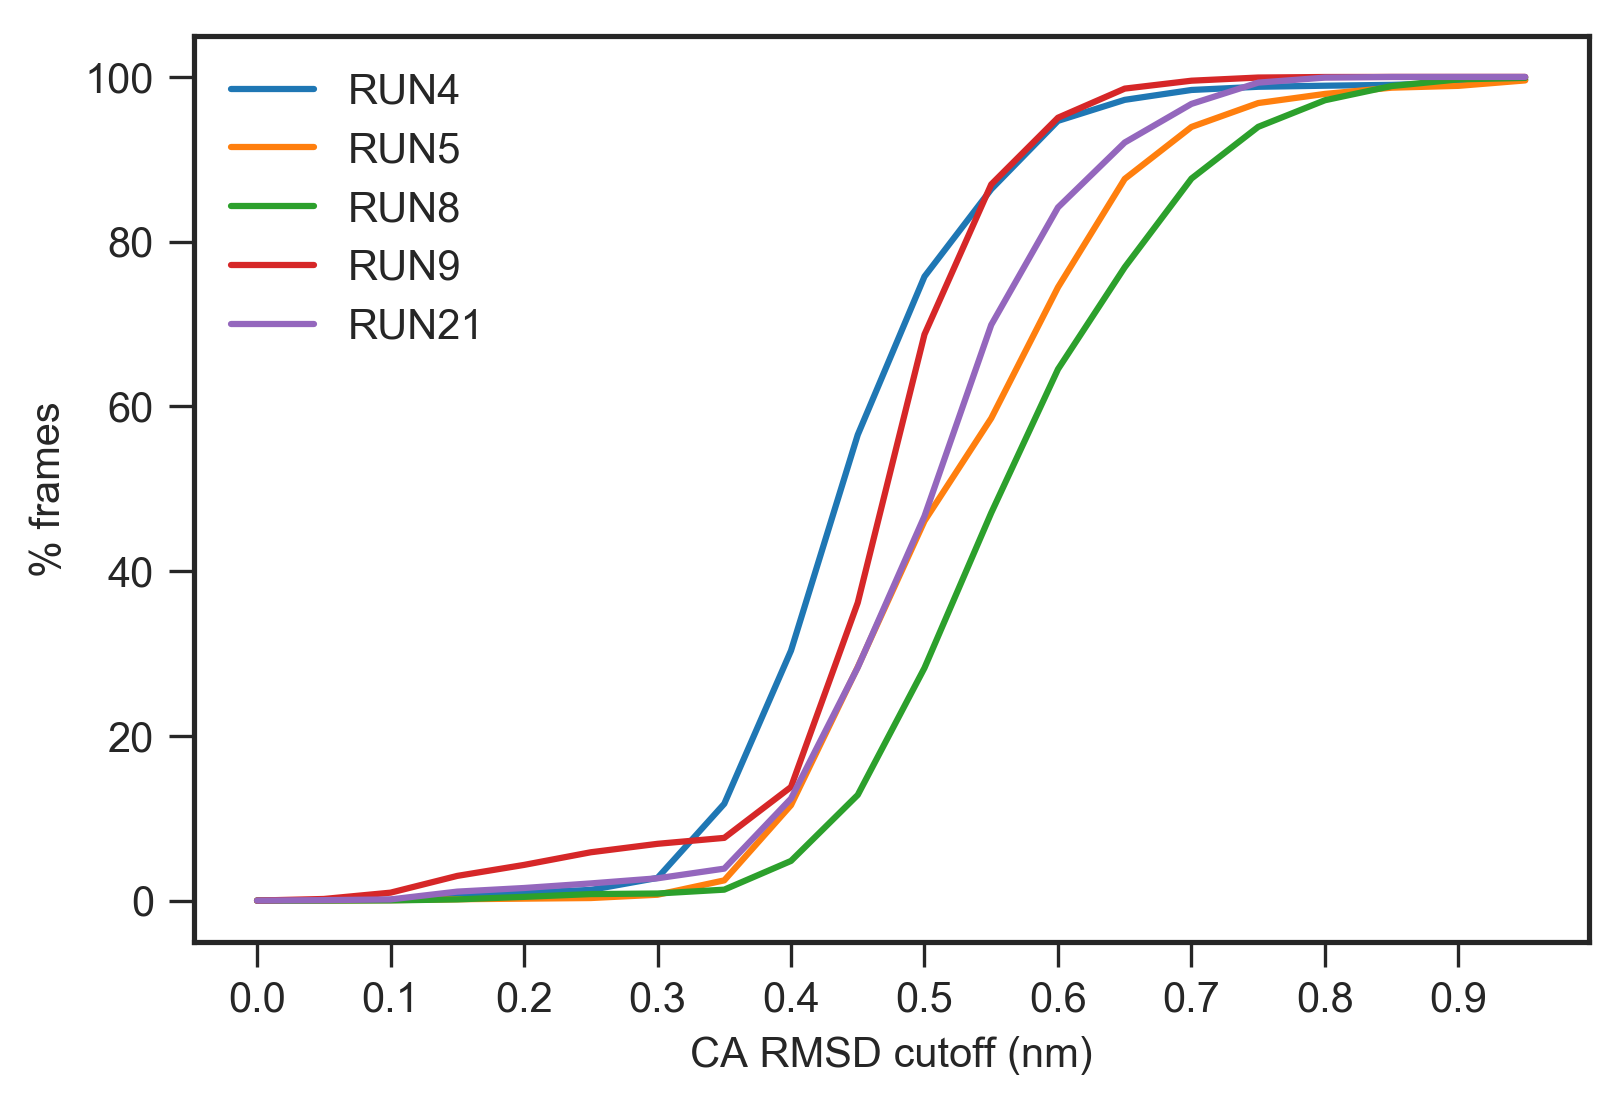

In [179]:
plt.figure(dpi=300)
plt.plot([x[0] for x in results_pos], label='RUN4')
plt.plot([x[1] for x in results_pos], label='RUN5')
plt.plot([x[2] for x in results_pos], label='RUN8')
plt.plot([x[3] for x in results_pos], label='RUN9')
plt.plot([x[4] for x in results_pos], label='RUN21')
plt.xticks(np.arange(0, len(np.arange(0,1,0.05)), 2), np.arange(0,1.1,0.1))
plt.xlabel('CA RMSD cutoff (nm)')
plt.ylabel('% frames')
plt.legend()
plt.show()

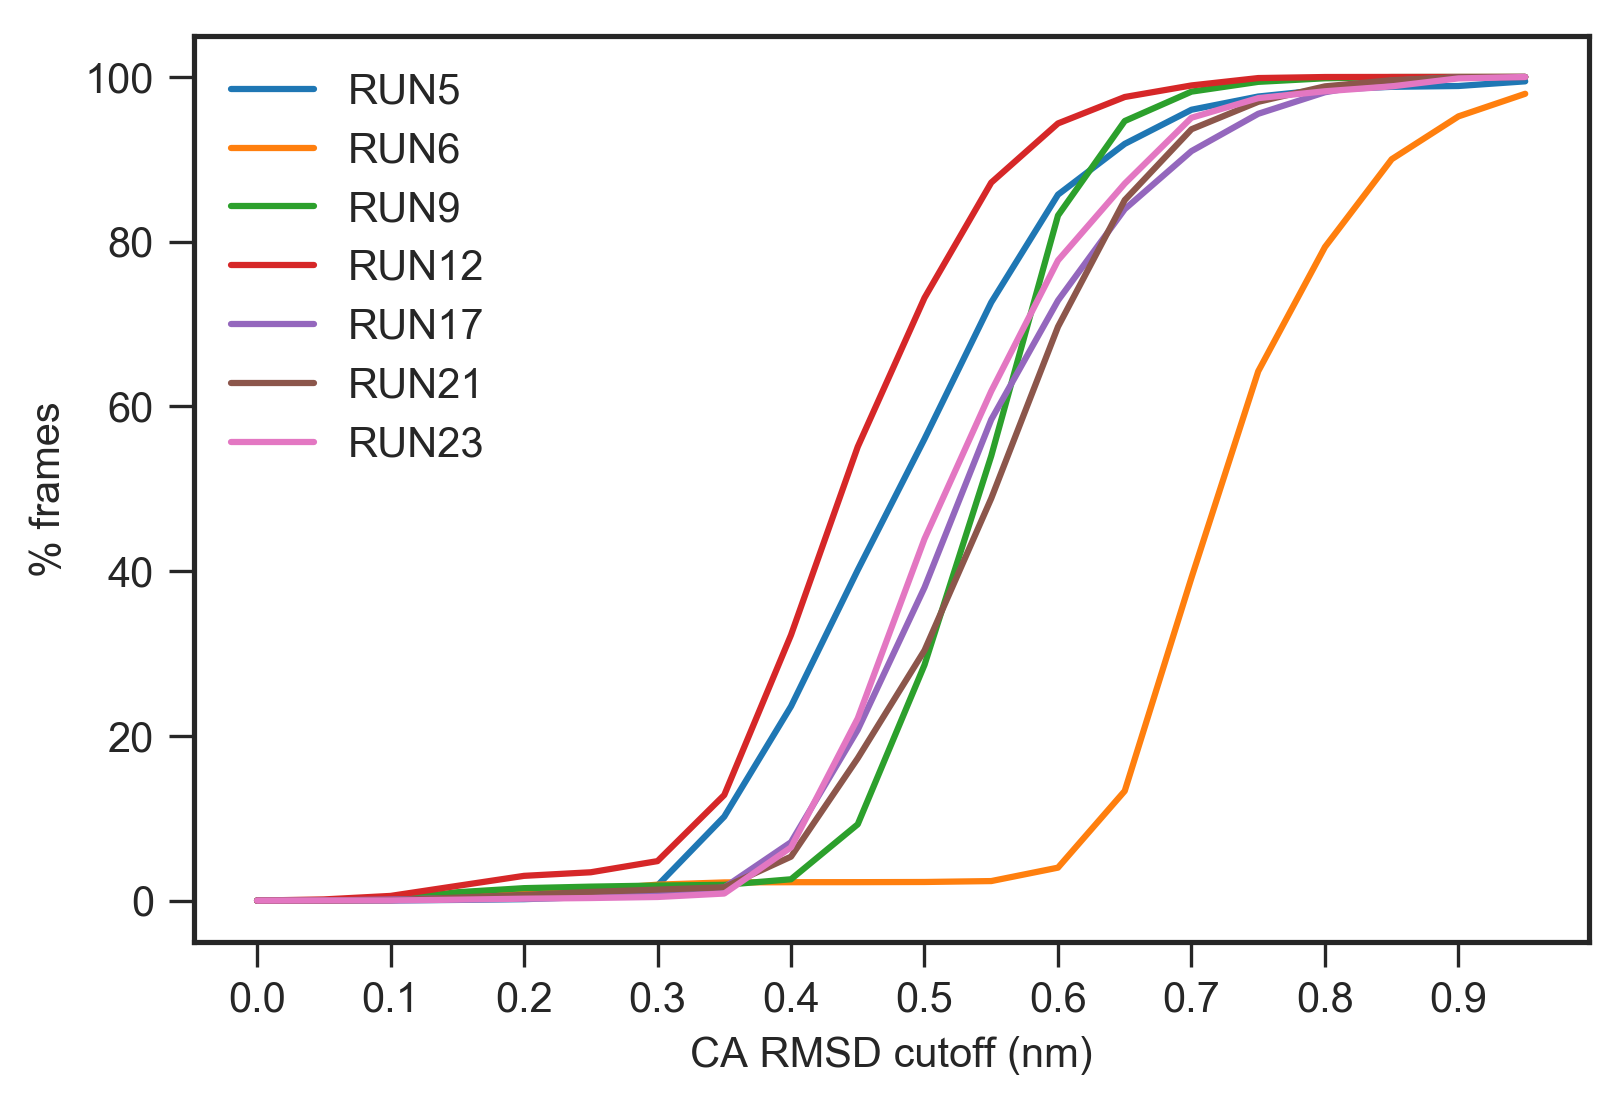

In [180]:
plt.figure(dpi=300)
plt.plot([x[0] for x in results_neg], label='RUN5')
plt.plot([x[1] for x in results_neg], label='RUN6')
plt.plot([x[2] for x in results_neg], label='RUN9')
plt.plot([x[3] for x in results_neg], label='RUN12')
plt.plot([x[4] for x in results_neg], label='RUN17')
plt.plot([x[5] for x in results_neg], label='RUN21')
plt.plot([x[6] for x in results_neg], label='RUN23')
plt.xticks(np.arange(0, len(np.arange(0,1,0.05)), 2), np.arange(0,1.1,0.1))
plt.xlabel('CA RMSD cutoff (nm)')
plt.ylabel('% frames')
plt.legend()
plt.show()

In [181]:
# at 0.3, 0.35, 0.4 extract the frames 

In [8]:
threshold = 0.3

pos_new_conf_rmsds_under_threshold = []
pos_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(pos_new_conf_rmsds):
    pos_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        pos_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
    
    unique_length = len(set(np.concatenate(pos_new_conf_rmsds_under_threshold[-1])))
    pos_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/pos_mut_traj_lengths[i])
        
neg_new_conf_rmsds_under_threshold = []
neg_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(neg_new_conf_rmsds):
    neg_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        neg_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
        
    unique_length = len(set(np.concatenate(neg_new_conf_rmsds_under_threshold[-1])))
    neg_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/neg_mut_traj_lengths[i])    

In [6]:
pos_new_conf_rmsds_under_threshold_numbers

[2.7491921451652996,
 0.7081625046589638,
 0.857213745192904,
 6.889964024314601,
 2.7044970562445196]

In [7]:
neg_new_conf_rmsds_under_threshold_numbers

[1.8287986085227979,
 1.9339091250469396,
 1.8248356283339535,
 4.789884715507624,
 0.8342644320297952,
 1.3290742828510584,
 0.43435095557210224]

In [17]:
# reorganize frame indexes into groups of new conformation sets

pos_new_conf_indexes_3 = []
neg_new_conf_indexes_3 = []

# positive
# run 4
indexes = pos_new_conf_rmsds_under_threshold[0]
run = [set(np.concatenate(indexes[0:10])), set(np.concatenate(indexes[10:36]))]
pos_new_conf_indexes_3.append(run)

# run 5
indexes = pos_new_conf_rmsds_under_threshold[1]
run = [set(np.concatenate(indexes))]
pos_new_conf_indexes_3.append(run)

# run 8
indexes = pos_new_conf_rmsds_under_threshold[2]
run = [set(np.concatenate(indexes))]
pos_new_conf_indexes_3.append(run)

# run 9
indexes = pos_new_conf_rmsds_under_threshold[3]
run = [set(np.concatenate(indexes[0:39])), set(np.concatenate(indexes[39:70])), set(np.concatenate(indexes[70:113])), set(np.concatenate(indexes[113:156]))]
pos_new_conf_indexes_3.append(run)

# run 21
indexes = pos_new_conf_rmsds_under_threshold[4]
run = [set(np.concatenate(indexes[0:19])), set(np.concatenate(indexes[19:41]))]
pos_new_conf_indexes_3.append(run)

# negative
# run 5
indexes = neg_new_conf_rmsds_under_threshold[0]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_3.append(run)

# run 6
indexes = neg_new_conf_rmsds_under_threshold[1]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_3.append(run)

# run 9
indexes = neg_new_conf_rmsds_under_threshold[2]
run = [set(np.concatenate(indexes[0:3])), set(np.concatenate(indexes[3:])),]
neg_new_conf_indexes_3.append(run)

# run 12
indexes = neg_new_conf_rmsds_under_threshold[3]
run = [set(np.concatenate(indexes[0:51])), set(np.concatenate(indexes[51:73])), set(np.concatenate(indexes[73:112]))]
neg_new_conf_indexes_3.append(run)

# run 17
indexes = neg_new_conf_rmsds_under_threshold[4]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_3.append(run)

# run 21
indexes = neg_new_conf_rmsds_under_threshold[5]
run = [set(np.concatenate(indexes[0:1])), set(np.concatenate(indexes[1:2])), set(np.concatenate(indexes[2:4])), set(np.concatenate(indexes[4:7]))]
neg_new_conf_indexes_3.append(run)

# run 23
indexes = neg_new_conf_rmsds_under_threshold[6]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_3.append(run)

In [225]:
pos_new_conf_indexes_3_lens = []
neg_new_conf_indexes_3_lens = []

for x in pos_new_conf_indexes_3:
    for y in x:
        pos_new_conf_indexes_3_lens.append(len(y))
    
for x in neg_new_conf_indexes_3:
    for y in x:
        neg_new_conf_indexes_3_lens.append(len(y))    

In [226]:
pos_new_conf_indexes_3_lens

[1633, 579, 570, 691, 1244, 1624, 1471, 1215, 1095, 1064]

In [227]:
neg_new_conf_indexes_3_lens

[1472, 1545, 266, 1205, 887, 1776, 1201, 672, 530, 718, 925, 1048, 350]

In [228]:
# now extract and save every 10th as pdb's

In [237]:
pos_runs = [4,5,8,9,21]

for i, run_ in enumerate(pos_new_conf_indexes_3):
    run = pos_runs[i]
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    for j, group in enumerate(run_):
        group = list(group)[::10]
        traj = all_mut_traj[group]
        traj.save('/Volumes/DATA/11713_pos_newconf_frames_within_3A/run%d-%d.pdb' % (run, j))

In [9]:
neg_runs = [5,6,9,12,17,21,23]

for i, run_ in enumerate(neg_new_conf_indexes_3):
    run = neg_runs[i]
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    for j, group in enumerate(run_):
        group = list(group)[::10]
        traj = all_mut_traj[group]
        traj.save('/Volumes/DATA/11713_neg_newconf_frames_within_3A/run%d-%d.pdb' % (run, j))

In [ ]:
# AFTER SHI MANUAL CHECK - we go with the 3A threshold, all frames except some for RUN5 negative are new
# now get all the indexes together for pos and neg, set them (remove duplicates) and hence quantify population

In [104]:
# repeat stuff from above

In [ ]:
pos_new_conf_dict = {
4: [[51,60], [560,585]], 
5: [[1,8]],  
8: [[113,118]], 
9: [[195,233], [248,278], [467,509], [606,648]],  
21: [[274,292], [402,423]],
}

neg_new_conf_dict = {
5: [[1,6]], 
6: [[496,521]],
9: [[162,164], [269,269], [272,272], [276,279], [282,282], [284,284], [286,287], [291,291], [293,293], [297,297], [300,300], [301,301], [303,303], [312,312], [316,316]],
12: [[397,447], [550,571], [572,610]],
17: [[344,355]], 
21: [[312,312], [319,319], [321,322], [327,329]],
23: [[20,29]]}

pos_new_conf_trajs = []
pos_new_conf_rmsds = []

for run in np.sort([run for run in pos_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_pos/run%d.h5' % run)
    limits = pos_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    pos_new_conf_trajs.append(traj_combined)
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    all_mut_traj = all_mut_traj.atom_slice(traj.top.select('name CA'))
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        traj = traj.atom_slice(traj.top.select('name CA'))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    rmsds = []
    for frame in traj_combined:
        rmsd = md.rmsd(all_mut_traj, frame)
        rmsds.append(rmsd)
    pos_new_conf_rmsds.append(rmsds)    

neg_new_conf_trajs = []
neg_new_conf_rmsds = []

for run in np.sort([run for run in neg_new_conf_dict]):
    traj = md.load('/Volumes/DATA/11713_extracted_frames_neg/run%d.h5' % run)
    limits = neg_new_conf_dict[run]
    for i, limit in enumerate(limits):
        traj_ = traj[(limit[0]-1):limit[1]]
        traj_ = traj_.atom_slice(traj_.top.select('name CA'))
        if i == 0:
            traj_combined = traj_
        else:
            traj_combined = md.join([traj_combined, traj_])
    neg_new_conf_trajs.append(traj_combined)           
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    all_mut_traj = all_mut_traj.atom_slice(traj.top.select('name CA'))
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        traj = traj.atom_slice(traj.top.select('name CA'))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    rmsds = []
    for frame in traj_combined:
        rmsd = md.rmsd(all_mut_traj, frame)
        rmsds.append(rmsd)
    neg_new_conf_rmsds.append(rmsds)    

In [ ]:
pos_mut_traj_lengths = []
neg_mut_traj_lengths = []

for run in np.sort([run for run in pos_new_conf_dict]):
    length = 0
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        length += len(traj)
        
    pos_mut_traj_lengths.append(length)
    
for run in np.sort([run for run in neg_new_conf_dict]):
    length = 0
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        length += len(traj)
        
    neg_mut_traj_lengths.append(length)    

In [ ]:
threshold = 0.3

pos_new_conf_rmsds_under_threshold = []
pos_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(pos_new_conf_rmsds):
    pos_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        pos_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
    
    unique_length = len(set(np.concatenate(pos_new_conf_rmsds_under_threshold[-1])))
    pos_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/pos_mut_traj_lengths[i])
        
neg_new_conf_rmsds_under_threshold = []
neg_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(neg_new_conf_rmsds):
    neg_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        neg_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
        
    unique_length = len(set(np.concatenate(neg_new_conf_rmsds_under_threshold[-1])))
    neg_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/neg_mut_traj_lengths[i])    

In [18]:
# first make lists of indexes of 10-strided trajs - i.e. those that Shi checked

In [27]:
pos_runs = [4,5,8,9,21]
pos_new_conf_indexes_3_10strided = []

for i, run_ in enumerate(pos_new_conf_indexes_3):
    pos_new_conf_indexes_3_10strided.append([])
    for j, group in enumerate(run_):
        group = list(group)[::10]
        pos_new_conf_indexes_3_10strided[-1].append(group)

In [28]:
neg_runs = [5,6,9,12,17,21,23]
neg_new_conf_indexes_3_10strided = []

for i, run_ in enumerate(neg_new_conf_indexes_3):
    neg_new_conf_indexes_3_10strided.append([])
    for j, group in enumerate(run_):
        group = list(group)[::10]
        neg_new_conf_indexes_3_10strided[-1].append(group)

In [35]:
len(neg_new_conf_indexes_3_10strided[0][0])

148

In [ ]:
#actual new conformations for RUN5 negative - of the frames above: 25, 28, 29, 31, 32, 34-67, 69-104, 123 - 
# these are 1-indexed
# 0-indexed, with right ranges:
24
27
28
30
31
33-67
68-104
122

In [39]:
new_confs = []

new_confs.append(neg_new_conf_indexes_3_10strided[0][0][24])
new_confs.append(neg_new_conf_indexes_3_10strided[0][0][27])
new_confs.append(neg_new_conf_indexes_3_10strided[0][0][28])
new_confs.append(neg_new_conf_indexes_3_10strided[0][0][30])
new_confs.append(neg_new_conf_indexes_3_10strided[0][0][31])

for x in neg_new_conf_indexes_3_10strided[0][0][33:67]:
    new_confs.append(x)
    
for x in neg_new_conf_indexes_3_10strided[0][0][68:104]:
    new_confs.append(x)
    
new_confs.append(neg_new_conf_indexes_3_10strided[0][0][122])    

In [41]:
len(new_confs)

76

In [42]:
neg_new_conf_indexes_3_10strided[0][0] = new_confs

In [76]:
new_conf_lens = dict()

pos_runs = [4,5,8,9,21]
neg_runs = [5,6,9,12,17,21,23]
all_runs = [4,5,6,8,9,12,17,21,23]

for run in all_runs:
    indexes = []
    if run in pos_runs:
        indexes.append(pos_new_conf_indexes_3_10strided[np.argwhere(np.array(pos_runs) == run)[0,0]])
    if run in neg_runs:
        indexes.append(neg_new_conf_indexes_3_10strided[np.argwhere(np.array(neg_runs) == run)[0,0]])

    new_conf_lens[run] = len(set(np.concatenate(np.concatenate(np.array(indexes)))))

In [77]:
new_conf_lens

{4: 222, 5: 133, 6: 155, 8: 70, 9: 607, 12: 388, 17: 68, 21: 394, 23: 35}

In [86]:
# ok now calculate populations

In [87]:
pos_mut_traj_lengths

[80460, 80490, 80610, 80610, 79830]

In [88]:
neg_mut_traj_lengths

[80490, 79890, 80610, 80670, 80550, 79830, 80580]

In [89]:
all_mut_traj_lengths = [pos_mut_traj_lengths[0], neg_mut_traj_lengths[0], neg_mut_traj_lengths[1], pos_mut_traj_lengths[2], neg_mut_traj_lengths[2], neg_mut_traj_lengths[3], neg_mut_traj_lengths[4], neg_mut_traj_lengths[5], neg_mut_traj_lengths[6]] 

In [90]:
all_mut_traj_lengths

[80460, 80490, 79890, 80610, 80610, 80670, 80550, 79830, 80580]

In [101]:
new_conf_lens_percentage = dict()
all_runs = [4,5,6,8,9,12,17,21,23]

for i,run in enumerate(all_runs):
    # * 10 because the chosen frames were 10-strided, * 100 for %
    new_conf_lens_percentage[run] = (new_conf_lens[run]/all_mut_traj_lengths[i]) * 1000

In [102]:
new_conf_lens_percentage

{4: 2.759134973900075,
 5: 1.6523791775375822,
 6: 1.9401677306296157,
 8: 0.8683786130753008,
 9: 7.53008311623868,
 12: 4.809718606669145,
 17: 0.8441961514587213,
 21: 4.935487911812602,
 23: 0.43435095557210224}

In [103]:
# great - now I want to see what these populations are if we only consider the frames after 750 ns

In [105]:
# we need a list of all mutant trajectory frame indexes that are after 750 ns, and combined lengths
# of such trajectories

In [106]:
# lengths

In [121]:
pos_mut_traj_lengths = []
neg_mut_traj_lengths = []

for run in np.sort([run for run in pos_new_conf_dict]):
    length = 0
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        if len(traj) > 1500:
            length += len(traj) - 1500
        
    pos_mut_traj_lengths.append(length)
    
for run in np.sort([run for run in neg_new_conf_dict]):
    length = 0
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        if len(traj) > 1500:
            length += len(traj) - 1500
        
    neg_mut_traj_lengths.append(length)    

In [122]:
pos_mut_traj_lengths

[20460, 20490, 20610, 20610, 20100]

In [123]:
neg_mut_traj_lengths

[20490, 20010, 20610, 20670, 20550, 20100, 20580]

In [124]:
all_mut_traj_lengths = [pos_mut_traj_lengths[0], neg_mut_traj_lengths[0], neg_mut_traj_lengths[1], pos_mut_traj_lengths[2], neg_mut_traj_lengths[2], neg_mut_traj_lengths[3], neg_mut_traj_lengths[4], neg_mut_traj_lengths[5], neg_mut_traj_lengths[6]] 

In [153]:
all_mut_traj_lengths

[20460, 20490, 20010, 20610, 20610, 20670, 20550, 20100, 20580]

In [ ]:
# indexes

In [126]:
pos_mut_traj_lens = []
neg_mut_traj_lens = []

for run in np.sort([run for run in pos_new_conf_dict]):
    lens = []
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        lens.append(len(traj))
        
    pos_mut_traj_lens.append(lens)
    
for run in np.sort([run for run in neg_new_conf_dict]):
    lens = []
    for clone in np.arange(0,40):
        traj = md.open('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        lens.append(len(traj))
        
    neg_mut_traj_lens.append(lens)    

In [142]:
pos_mut_traj_indexes = []

for run in pos_mut_traj_lens:
    cumulative_index = 0
    pos_mut_traj_indexes.append([])
    for traj_len in run:
        for i in range(traj_len):
            if i >= 1500: 
                pos_mut_traj_indexes[-1].append(cumulative_index)
            cumulative_index += 1    
            
neg_mut_traj_indexes = []

for run in neg_mut_traj_lens:
    cumulative_index = 0
    neg_mut_traj_indexes.append([])
    for traj_len in run:
        for i in range(traj_len):
            if i >= 1500: 
                neg_mut_traj_indexes[-1].append(cumulative_index)
            cumulative_index += 1  

In [148]:
all_mut_traj_indexes = [pos_mut_traj_indexes[0], neg_mut_traj_indexes[0], neg_mut_traj_indexes[1], pos_mut_traj_indexes[2], neg_mut_traj_indexes[2], neg_mut_traj_indexes[3], neg_mut_traj_indexes[4], neg_mut_traj_indexes[5], neg_mut_traj_indexes[6]] 

In [151]:
new_conf_lens = dict()

pos_runs = [4,5,8,9,21]
neg_runs = [5,6,9,12,17,21,23]
all_runs = [4,5,6,8,9,12,17,21,23]

for i, run in enumerate(all_runs):
    indexes = []
    if run in pos_runs:
        indexes.append(pos_new_conf_indexes_3_10strided[np.argwhere(np.array(pos_runs) == run)[0,0]])
    if run in neg_runs:
        indexes.append(neg_new_conf_indexes_3_10strided[np.argwhere(np.array(neg_runs) == run)[0,0]])
        
    new_conf_set = set(np.concatenate(np.concatenate(np.array(indexes))))
    
    new_conf_set_after750ns = []
    
    for frame in new_conf_set:
        if frame in all_mut_traj_indexes[i]:
            new_conf_set_after750ns.append(frame)
            
    new_conf_lens[run] = len(new_conf_set_after750ns)        

In [152]:
new_conf_lens

{4: 118, 5: 76, 6: 51, 8: 51, 9: 227, 12: 157, 17: 51, 21: 165, 23: 34}

In [1]:
new_conf_lens_percentage = dict()
all_runs = [4,5,6,8,9,12,17,21,23]

for i,run in enumerate(all_runs):
    # * 10 because the chosen frames were 10-strided, * 100 for %
    new_conf_lens_percentage[run] = (new_conf_lens[run]/all_mut_traj_lengths[i]) * 1000

NameError: name 'new_conf_lens' is not defined

In [155]:
new_conf_lens_percentage

{4: 5.767350928641251,
 5: 3.709126403123475,
 6: 2.548725637181409,
 8: 2.4745269286754006,
 9: 11.01407083939835,
 12: 7.595549104983068,
 17: 2.4817518248175183,
 21: 8.208955223880597,
 23: 1.6520894071914478}

In [239]:
# now threshold 3.5A

In [10]:
threshold = 0.35

pos_new_conf_rmsds_under_threshold = []
pos_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(pos_new_conf_rmsds):
    pos_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        pos_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
    
    unique_length = len(set(np.concatenate(pos_new_conf_rmsds_under_threshold[-1])))
    pos_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/pos_mut_traj_lengths[i])
        
neg_new_conf_rmsds_under_threshold = []
neg_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(neg_new_conf_rmsds):
    neg_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        neg_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
        
    unique_length = len(set(np.concatenate(neg_new_conf_rmsds_under_threshold[-1])))
    neg_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/neg_mut_traj_lengths[i])    

In [11]:
pos_new_conf_rmsds_under_threshold_numbers

[11.751180710912255,
 2.452478568766306,
 1.3248976553777447,
 7.611958814042922,
 3.878241262683202]

In [12]:
neg_new_conf_rmsds_under_threshold_numbers

[10.193812896011927,
 2.203029165102015,
 1.907951867014018,
 12.81889178133135,
 1.5878336436995655,
 1.6134285356382312,
 0.8538098783817324]

In [13]:
# reorganize frame indexes into groups of new conformation sets

pos_new_conf_indexes_35 = []
neg_new_conf_indexes_35 = []

# positive
# run 4
indexes = pos_new_conf_rmsds_under_threshold[0]
run = [set(np.concatenate(indexes[0:10])), set(np.concatenate(indexes[10:36]))]
pos_new_conf_indexes_35.append(run)

# run 5
indexes = pos_new_conf_rmsds_under_threshold[1]
run = [set(np.concatenate(indexes))]
pos_new_conf_indexes_35.append(run)

# run 8
indexes = pos_new_conf_rmsds_under_threshold[2]
run = [set(np.concatenate(indexes))]
pos_new_conf_indexes_35.append(run)

# run 9
indexes = pos_new_conf_rmsds_under_threshold[3]
run = [set(np.concatenate(indexes[0:39])), set(np.concatenate(indexes[39:70])), set(np.concatenate(indexes[70:113])), set(np.concatenate(indexes[113:156]))]
pos_new_conf_indexes_35.append(run)

# run 21
indexes = pos_new_conf_rmsds_under_threshold[4]
run = [set(np.concatenate(indexes[0:19])), set(np.concatenate(indexes[19:41]))]
pos_new_conf_indexes_35.append(run)

# negative
# run 5
indexes = neg_new_conf_rmsds_under_threshold[0]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_35.append(run)

# run 6
indexes = neg_new_conf_rmsds_under_threshold[1]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_35.append(run)

# run 9
indexes = neg_new_conf_rmsds_under_threshold[2]
run = [set(np.concatenate(indexes[0:3])), set(np.concatenate(indexes[3:])),]
neg_new_conf_indexes_35.append(run)

# run 12
indexes = neg_new_conf_rmsds_under_threshold[3]
run = [set(np.concatenate(indexes[0:51])), set(np.concatenate(indexes[51:73])), set(np.concatenate(indexes[73:112]))]
neg_new_conf_indexes_35.append(run)

# run 17
indexes = neg_new_conf_rmsds_under_threshold[4]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_35.append(run)

# run 21
indexes = neg_new_conf_rmsds_under_threshold[5]
run = [set(np.concatenate(indexes[0:1])), set(np.concatenate(indexes[1:2])), set(np.concatenate(indexes[2:4])), set(np.concatenate(indexes[4:7]))]
neg_new_conf_indexes_35.append(run)

# run 23
indexes = neg_new_conf_rmsds_under_threshold[6]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_35.append(run)

pos_runs = [4,5,8,9,21]

for i, run_ in enumerate(pos_new_conf_indexes_35):
    run = pos_runs[i]
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    for j, group in enumerate(run_):
        group = list(group)[::10]
        traj = all_mut_traj[group]
        traj.save('/Volumes/DATA/11713_pos_newconf_frames_within_35A/run%d-%d.pdb' % (run, j))
        
neg_runs = [5,6,9,12,17,21,23]

for i, run_ in enumerate(neg_new_conf_indexes_35):
    run = neg_runs[i]
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    for j, group in enumerate(run_):
        group = list(group)[::10]
        traj = all_mut_traj[group]
        traj.save('/Volumes/DATA/11713_neg_newconf_frames_within_35A/run%d-%d.pdb' % (run, j))        

In [14]:
# threshold 4A

In [15]:
threshold = 0.4

pos_new_conf_rmsds_under_threshold = []
pos_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(pos_new_conf_rmsds):
    pos_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        pos_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
    
    unique_length = len(set(np.concatenate(pos_new_conf_rmsds_under_threshold[-1])))
    pos_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/pos_mut_traj_lengths[i])
        
neg_new_conf_rmsds_under_threshold = []
neg_new_conf_rmsds_under_threshold_numbers = []

for i,run in enumerate(neg_new_conf_rmsds):
    neg_new_conf_rmsds_under_threshold.append([])
    for frame in run:
        neg_new_conf_rmsds_under_threshold[-1].append(np.concatenate(np.argwhere(frame < threshold)))
        
    unique_length = len(set(np.concatenate(neg_new_conf_rmsds_under_threshold[-1])))
    neg_new_conf_rmsds_under_threshold_numbers.append(100*unique_length/neg_mut_traj_lengths[i])    

In [16]:
pos_new_conf_rmsds_under_threshold_numbers

[30.345513298533433,
 11.581562927071685,
 4.81329859818881,
 13.789852375635776,
 12.381310284354253]

In [17]:
neg_new_conf_rmsds_under_threshold_numbers

[23.579326624425395,
 2.229315308549255,
 2.585287185212753,
 32.2449485558448,
 7.087523277467412,
 5.330076412376299,
 6.456937205261852]

In [18]:
# reorganize frame indexes into groups of new conformation sets

pos_new_conf_indexes_4 = []
neg_new_conf_indexes_4 = []

# positive
# run 4
indexes = pos_new_conf_rmsds_under_threshold[0]
run = [set(np.concatenate(indexes[0:10])), set(np.concatenate(indexes[10:36]))]
pos_new_conf_indexes_4.append(run)

# run 5
indexes = pos_new_conf_rmsds_under_threshold[1]
run = [set(np.concatenate(indexes))]
pos_new_conf_indexes_4.append(run)

# run 8
indexes = pos_new_conf_rmsds_under_threshold[2]
run = [set(np.concatenate(indexes))]
pos_new_conf_indexes_4.append(run)

# run 9
indexes = pos_new_conf_rmsds_under_threshold[3]
run = [set(np.concatenate(indexes[0:39])), set(np.concatenate(indexes[39:70])), set(np.concatenate(indexes[70:113])), set(np.concatenate(indexes[113:156]))]
pos_new_conf_indexes_4.append(run)

# run 21
indexes = pos_new_conf_rmsds_under_threshold[4]
run = [set(np.concatenate(indexes[0:19])), set(np.concatenate(indexes[19:41]))]
pos_new_conf_indexes_4.append(run)

# negative
# run 5
indexes = neg_new_conf_rmsds_under_threshold[0]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_4.append(run)

# run 6
indexes = neg_new_conf_rmsds_under_threshold[1]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_4.append(run)

# run 9
indexes = neg_new_conf_rmsds_under_threshold[2]
run = [set(np.concatenate(indexes[0:3])), set(np.concatenate(indexes[3:])),]
neg_new_conf_indexes_4.append(run)

# run 12
indexes = neg_new_conf_rmsds_under_threshold[3]
run = [set(np.concatenate(indexes[0:51])), set(np.concatenate(indexes[51:73])), set(np.concatenate(indexes[73:112]))]
neg_new_conf_indexes_4.append(run)

# run 17
indexes = neg_new_conf_rmsds_under_threshold[4]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_4.append(run)

# run 21
indexes = neg_new_conf_rmsds_under_threshold[5]
run = [set(np.concatenate(indexes[0:1])), set(np.concatenate(indexes[1:2])), set(np.concatenate(indexes[2:4])), set(np.concatenate(indexes[4:7]))]
neg_new_conf_indexes_4.append(run)

# run 23
indexes = neg_new_conf_rmsds_under_threshold[6]
run = [set(np.concatenate(indexes))]
neg_new_conf_indexes_4.append(run)

pos_runs = [4,5,8,9,21]

for i, run_ in enumerate(pos_new_conf_indexes_4):
    run = pos_runs[i]
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    for j, group in enumerate(run_):
        group = list(group)[::10]
        traj = all_mut_traj[group]
        traj.save('/Volumes/DATA/11713_pos_newconf_frames_within_4A/run%d-%d.pdb' % (run, j))
        
neg_runs = [5,6,9,12,17,21,23]

for i, run_ in enumerate(neg_new_conf_indexes_4):
    run = neg_runs[i]
    
    all_mut_traj = md.load('/Volumes/DATA/11713/run%d-clone0.h5' % run)
    for clone in np.arange(1,40):
        traj = md.load('/Volumes/DATA/11713/run%d-clone%d.h5' % (run, clone))
        all_mut_traj = md.join([all_mut_traj, traj])
    
    for j, group in enumerate(run_):
        group = list(group)[::10]
        traj = all_mut_traj[group]
        traj.save('/Volumes/DATA/11713_neg_newconf_frames_within_4A/run%d-%d.pdb' % (run, j))        